# 41 - Seleccion Óptima del Número Clusters


* Uno de los ***problemas*** que nos encontramos a la hora de aplicar alguno de los métodos de Clustering es el de ***seleccionar el número de Clusters***.


* No existe un criterio objetivo ni ampliamente válido para la elección de un número óptimo de Clusters; pero tenemos que tener en cuenta, que una ***mala elección*** de los mismos puede dar lugar a realizar ***agrupaciones de datos muy heterogéneos (pocos Clusters); o datos, que siendo muy similares unos a otros los agrupemos en Clusters diferentes (muchos Clusters)***.


* Una de las técnicas más utilizadas para la selección del número de cluster es el ***“Método del codo” (Elbow Method)***.


* A parte del método del codo, existen otras técnicas para la selección del número óptimo de Clusters como:

    + Criterio de Calinsky
    + Affinity Propagation (AP)
    + El Gap (también con su versión estadística)
    + Dendrogramas
    
    
* En el siguiente enlace se puede ver como se implementan los métodos del Gap y Dendrogramas<br>https://jarroba.com/seleccion-del-numero-optimo-clusters/


<hr>


# Elbow Method


* El método del codo utiliza los ***valores de la inercia*** obtenidos tras aplicar el K-means ***a diferente número de Clusters (desde 1 a N Clusters)***.


* Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, ***representamos en una gráfica lineal la inercia respecto del número de Clusters***. 


* En esta gráfica ***se debería de apreciar un cambio brusco en la evolución de la inercia***, teniendo la línea representada una forma similar a la de un brazo y su codo.


* ***El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese dataset***; o dicho de otra manera: ***el punto que representaría al codo del brazo*** será el número óptimo de Clusters para ese data set.


* A continuación se van a mostrar dos ejemplos para ver como seleccionar el número óptimo de Clusters. Hay de destacar que estos ejemplos tienen una finalidad didactica y "el codo" se puede apreciar relativamente bien pero ***en problemas reales es más complicado aprecia el cambio brusco de tendencia y por tanto seleccionar el número óptimo de clusters***.


<hr>


## Ejemplo 1:


* Veamos cual sería el número óptimo de clusters para el dataset que contiene 999 elementos representados por dos variables X1 y X2:


* Vamos a cargar los datos y representar de manera visual la relación entre las dos variables.


* En primer lugar cargamos los datos:


In [1]:
import pandas as pd

df = pd.read_table('./data/DS_3Clusters_999Puntos.txt', sep='::', header=None, names=['X1', 'X2'], engine='python')
df.sample(4)

,X1,X2
16,4.912980,2.388060
279,5.832762,3.042505
121,6.542826,4.004121
881,2.334164,2.147859


* Visualizamos la relación entre las dos variables.

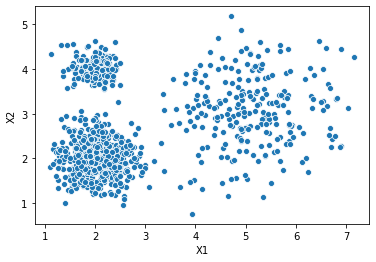

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.scatterplot(x="X1", y="X2", data = df)

### Generamos 'N' Modelos y calculamos la inercia para cada N


* Para seleccionar el número optimo de clusters vamos a generar 10 modelos que tendrán de 1 a 10 clusters ya vamos a medir la inercia para cada uno de esos modelos.

In [3]:
import numpy as np
from sklearn.cluster import KMeans

num_modelos = 10

# Cargamos los datos en un numpy array
X = np.loadtxt('./data/DS_3Clusters_999Puntos.txt', delimiter='::')

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])

### Pintamos los resultados de la inercia


* Podemos observar como se produce un cambio "brusco" de la inercia para 3 Clusters.

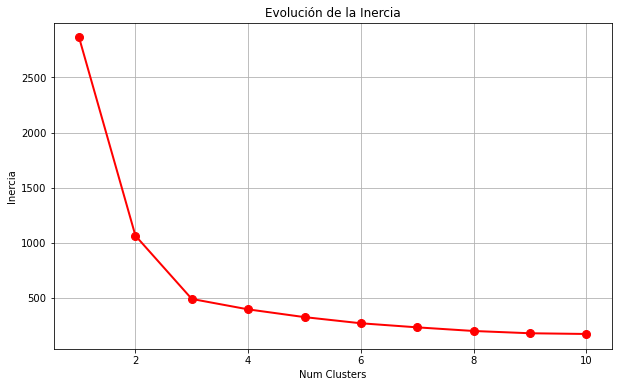

In [4]:
x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

### Respresentamos los resultados del Clustering con el 'K' seleccionado


* Vamos a realizar el Clustering para 3 Clusters y visualizar sus resultados:

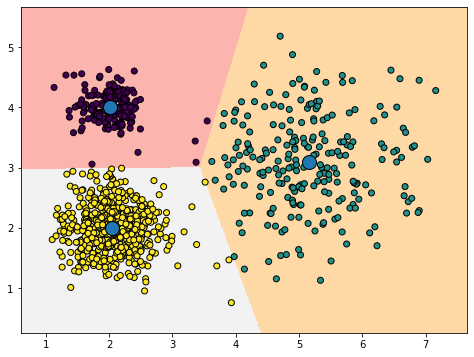

In [5]:
num_clusters = 3
# Creamos un objeto KMeans
kmeans_1 = KMeans(n_clusters=num_clusters, max_iter=30, init='random')

# Ajustamos el modelo
kmeans_1.fit(X)

# Dibujamos los resultados
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = kmeans_1.predict(np.c_[xx.ravel(), yy.ravel()]) 

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Dibujamos los puntos del dataset
labels = kmeans_1.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = kmeans_1.cluster_centers_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

# Pintamos la gráfica
plt.show()

<hr>


## Ejemplo 2:


* Veamos cual sería el número óptimo de clusters para el dataset que contiene los tamaños del petalo y sepalo de las flores.


* Vamos a cargar los datos y representar de manera visual la relación entre las dos variables.


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris_para_clustering.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver:
    - ***petal_length***: El "largo" del Sepalo
    - ***petal_width***: El "ancho" del Sepalo

In [6]:
df = pd.read_csv("./data/iris/iris_para_clustering.csv")
df[['petal_length', 'petal_width']].sample(5)

,petal_length,petal_width
135,6.1,2.3
129,5.8,1.6
59,3.9,1.4
97,4.3,1.3
83,5.1,1.6


* Visualizamos la relación entre las dos variables.

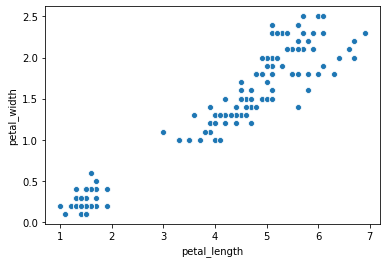

In [7]:
sns.scatterplot(x="petal_length", y="petal_width", data = df)

### Generamos 'N' Modelos y calculamos la inercia para cada N


* Para seleccionar el número optimo de clusters vamos a generar 10 modelos que tendrán de 1 a 10 clusters ya vamos a medir la inercia para cada uno de esos modelos.

In [8]:
import numpy as np
from sklearn.cluster import KMeans

num_modelos = 10

# Cargamos los datos en un numpy array
X = df[['petal_length', 'petal_width']].values 

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])

### Pintamos los resultados de la inercia


* Podemos observar como se produce un cambio "brusco" de la inercia para 2 Clusters.

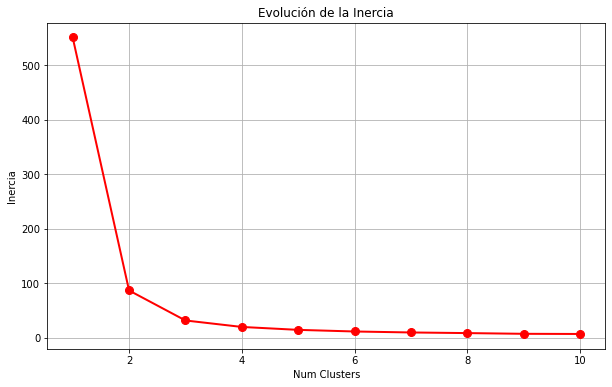

In [9]:
x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

### Respresentamos los resultados del Clustering con el 'K' seleccionado


* Vamos a realizar el Clustering para 3 Clusters y visualizar sus resultados:

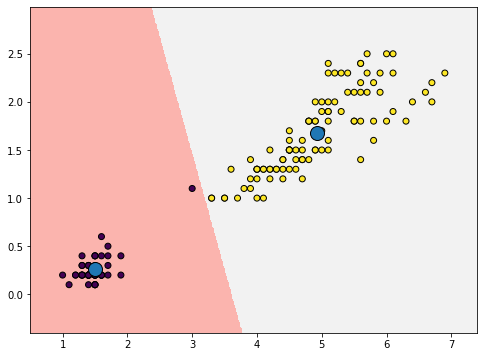

In [10]:
num_clusters = 2
# Creamos un objeto KMeans
kmeans_2 = KMeans(n_clusters=num_clusters, max_iter=30, init='random')

# Ajustamos el modelo
kmeans_2.fit(X)

# Dibujamos los resultados
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = kmeans_2.predict(np.c_[xx.ravel(), yy.ravel()]) 

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Dibujamos los puntos del dataset
labels = kmeans_2.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = kmeans_2.cluster_centers_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

# Pintamos la gráfica
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">